In [112]:
import shapely
from shapely import geometry
from shapely.geometry import shape, Point, LineString, Polygon
import fiona
import geopandas as gpd
import numpy as np
import geopandas as gp

In [113]:
# Open the dataset from the file
shapefile = fiona.open('./data/shapefiles/CLC2006_PT_v3/CLC2006_PT_v3.shp')
# Make sure the dataset exists -- it would be None if we couldn't open it
if not shapefile:
    print('Error: could not open shapefile')

In [114]:
### Let's get the driver from this file
driver = shapefile.driver
print('Dataset driver is: {n}\n'.format(n=driver))

### How many features are contained in this Shapefile?
feature_count = len(shapefile)
print('The shapefile has {n} feature(s)\n'.format(n=feature_count))

### What is the shapefiles's projection?
# Get the spatial reference
spatial_ref = shapefile.crs
print('The shapefiles spatial ref is:\n', spatial_ref, '\n')

# Let's pull out a specific feature from the shapefile
feature = shapefile[0]

### What is the features's geometry? is it a point? a polyline? a polygon?
geometry = feature['geometry']['type']
print("The features's geometry is: {geom}\n".format(geom=geometry))

### How many properties are in the shapefile, and what are their names?
properties = feature["properties"].keys()

# How many fields
field_count = len(properties)
print('Layer has {n} fields'.format(n=field_count))

# What are their names?
print('Their names are: ')
for prop in properties:
    print('\t{name}'.format(name=prop))

Dataset driver is: ESRI Shapefile

The shapefile has 53434 feature(s)

The shapefiles spatial ref is:
 {'proj': 'tmerc', 'lat_0': 39.6682583333333, 'lon_0': -8.13310833333333, 'k': 1, 'x_0': 0, 'y_0': 0, 'ellps': 'GRS80', 'units': 'm', 'no_defs': True} 

The features's geometry is: Polygon

Layer has 4 fields
Their names are: 
	AREA_ha
	CLC2006
	Legenda
	ID


In [115]:
shapefile.meta

{'driver': 'ESRI Shapefile',
 'schema': {'properties': OrderedDict([('AREA_ha', 'float:19.11'),
               ('CLC2006', 'int:3'),
               ('Legenda', 'str:200'),
               ('ID', 'int:9')]),
  'geometry': 'Polygon'},
 'crs': {'proj': 'tmerc',
  'lat_0': 39.6682583333333,
  'lon_0': -8.13310833333333,
  'k': 1,
  'x_0': 0,
  'y_0': 0,
  'ellps': 'GRS80',
  'units': 'm',
  'no_defs': True},
 'crs_wkt': 'PROJCS["ETRS89_Portugal_TM06",GEOGCS["GCS_ETRS_1989",DATUM["D_ETRS_1989",SPHEROID["GRS_1980",6378137,298.257222101]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",39.6682583333333],PARAMETER["central_meridian",-8.13310833333333],PARAMETER["scale_factor",1],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["Meter",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'}

In [116]:
feature = shapefile[0]
feature # The result is a Python dictionary

{'type': 'Feature',
 'id': '0',
 'properties': OrderedDict([('AREA_ha', 287.471753986),
              ('CLC2006', 111),
              ('Legenda', 'Tecido urbano contínuo'),
              ('ID', 1)]),
 'geometry': {'type': 'Polygon',
  'coordinates': [[(18685.920399999515, -293338.3856000042),
    (18770.192800001725, -293402.058100003),
    (18972.73829999993, -293371.5312000034),
    (19233.148400000366, -293341.500000003),
    (19125.52539999966, -293461.4687000036),
    (18989.177700000182, -293583.1562000025),
    (18842.085000001254, -293690.1147000051),
    (18871.12509999931, -293752.06900000526),
    (18905.981500000224, -293796.8845000027),
    (18930.879099999394, -293856.6382000037),
    (18960.756000000594, -293881.53560000093),
    (19000.591800000107, -293889.00490000314),
    (19045.407200000267, -293884.02540000394),
    (19097.69180000045, -293859.1279000038),
    (19164.914900001688, -293846.679200003),
    (19212.220000000023, -293871.57670000417),
    (19237.1173999

In [117]:
feature.keys()

dict_keys(['type', 'id', 'properties', 'geometry'])

In [118]:
print('id: ', feature['id']) #gives the id
print('Land Cover Class: ', feature['properties']['Legenda']) # gives the value of the classname attribute

print('\ngeometry: ', feature['geometry']) # gives the geometry, GeoJSON format

id:  0
Land Cover Class:  Tecido urbano contínuo

geometry:  {'type': 'Polygon', 'coordinates': [[(18685.920399999515, -293338.3856000042), (18770.192800001725, -293402.058100003), (18972.73829999993, -293371.5312000034), (19233.148400000366, -293341.500000003), (19125.52539999966, -293461.4687000036), (18989.177700000182, -293583.1562000025), (18842.085000001254, -293690.1147000051), (18871.12509999931, -293752.06900000526), (18905.981500000224, -293796.8845000027), (18930.879099999394, -293856.6382000037), (18960.756000000594, -293881.53560000093), (19000.591800000107, -293889.00490000314), (19045.407200000267, -293884.02540000394), (19097.69180000045, -293859.1279000038), (19164.914900001688, -293846.679200003), (19212.220000000023, -293871.57670000417), (19237.1173999994, -293906.4330000041), (19224.66869999973, -293958.7176000019), (19184.83280000141, -294045.85860000364), (19197.198100001053, -294100.2661000048), (19251.56850000137, -294127.4687000031), (19354.75200000069, -29419

<class 'shapely.geometry.polygon.Polygon'>


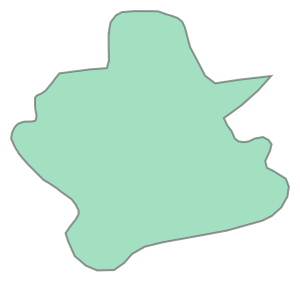

In [119]:
shapely_shape = shape(feature['geometry'])
print(type(shapely_shape))

shapely_shape

In [120]:
shapefile = gpd.read_file('./data/shapefiles/CLC2012_PT_v2/CLC2012_PT_v2.shp')
shapefile.head()

,AREA_ha,CLC2012,Legenda,ID,geometry
0,287.471754,111,Tecido urbano contínuo,1,"POLYGON ((18685.920 -293338.386, 18770.193 -29..."
1,275.900895,111,Tecido urbano contínuo,2,"POLYGON ((26764.900 -291471.875, 26786.334 -29..."
2,101.100914,111,Tecido urbano contínuo,3,"POLYGON ((3106.160 -287769.063, 3100.722 -2878..."
3,28.932375,111,Tecido urbano contínuo,4,"POLYGON ((-48135.685 -284368.597, -48105.974 -..."
4,109.973855,111,Tecido urbano contínuo,5,"POLYGON ((-21147.143 -284032.092, -21014.035 -..."


In [121]:
shapefile_filtered = shapefile.filter(['Legenda', 'geometry'])
shapefile_filtered.head()

,Legenda,geometry
0,Tecido urbano contínuo,"POLYGON ((18685.920 -293338.386, 18770.193 -29..."
1,Tecido urbano contínuo,"POLYGON ((26764.900 -291471.875, 26786.334 -29..."
2,Tecido urbano contínuo,"POLYGON ((3106.160 -287769.063, 3100.722 -2878..."
3,Tecido urbano contínuo,"POLYGON ((-48135.685 -284368.597, -48105.974 -..."
4,Tecido urbano contínuo,"POLYGON ((-21147.143 -284032.092, -21014.035 -..."


In [122]:
initial_crs = shapefile.crs

In [123]:
from pyproj import CRS
CRS(shapefile.crs)

<Projected CRS: +proj=tmerc +lat_0=39.6682583333333 +lon_0=-8.1331 ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Transverse Mercator
Datum: Unknown based on GRS80 ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [124]:
shapefile.bounds

,minx,miny,maxx,maxy
0,17080.0215,-294951.4999,19380.1993,-292804.0811
1,25014.5391,-293571.3437,28100.6895,-291199.6236
2,2126.1274,-289232.5311,3577.8242,-287665.0312
3,-48281.8595,-285265.3470,-47693.6214,-284303.3125
4,-21405.6196,-285051.4061,-19507.7148,-284032.0916
...,...,...,...,...
53771,-48575.9047,167635.7850,-46146.6718,169701.0000
53772,-55076.6484,204694.1563,-50910.5976,208331.8906
53773,-59396.1259,223007.5131,-52912.2656,225591.9688
53774,-61277.9374,243545.4956,-51113.0195,252421.6141


In [125]:
shapefile = shapefile.to_crs({'init': 'epsg:4326'})

C:\ProgramData\Anaconda3\envs\geo_py37\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


In [126]:
shapefile.geometry = shapefile.geometry.map(lambda polygon: shapely.ops.transform(lambda x, y: (y, x), polygon))

In [127]:
shapefile.bounds

,minx,miny,maxx,maxy
0,37.010940,-7.941171,37.030284,-7.915333
1,37.023193,-7.851944,37.044540,-7.817265
2,37.062634,-8.109201,37.076760,-8.092880
3,37.097166,-8.676275,37.105817,-8.669628
4,37.100102,-8.373929,37.109262,-8.352574
...,...,...,...,...
53771,41.176503,-8.712066,41.195187,-8.683211
53772,41.509872,-8.793162,41.542466,-8.742993
53773,41.674274,-8.846448,41.697963,-8.768713
53774,41.859026,-8.871157,41.939640,-8.749444


In [128]:
unique= np.unique(shapefile['Legenda'])
print('List of Land Cover Classes:')
unique

List of Land Cover Classes:


array(['Aeroportos e aeródromos',
       'Agricultura com espaços naturais e semi-naturais', 'Arrozais',
       'Culturas temporárias de regadio',
       'Culturas temporárias de sequeiro',
       'Culturas temporárias e/ou pastagens associadas a culturas permanentes',
       'Cursos de água', 'Desembocaduras fluviais',
       'Equipamentos desportivos, culturais e de lazer e zonas históricas',
       'Espaços verdes urbanos',
       'Florestas abertas, cortes e novas plantações',
       'Florestas de folhosas', 'Florestas de resinosas',
       'Florestas mistas', 'Indústria, comércio e equipamentos gerais',
       'Lagoas costeiras', 'Matos', 'Oceano', 'Olivais',
       'Pastagens permanentes', 'Paúis', 'Planos de água', 'Pomares',
       'Praias, dunas e areais',
       'Redes viárias e ferroviárias e espaços associados', 'Rocha nua',
       'Salinas e aquicultura litoral', 'Sapais',
       'Sistemas agro-florestais',
       'Sistemas culturais e parcelares complexos',
       'Tecido

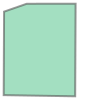

In [129]:
polygon = Polygon([ # from manifest.safe
    (39.073198659648654, -8.8871765),
    (39.0526886902376, -8.894318),
    (38.906045290370265 ,-8.945374),
    (38.760328595167564 ,-8.996094),
    (38.755193805393134 ,-10.151337),
    (39.74439520181332 ,-10.167633),
    (39.750212021802014 ,-8.886078),
    (39.073198659648654 ,-8.8871765)
])
polygon

In [130]:
imageBounds = gp.GeoDataFrame(crs={'init': 'epsg:4326'})

In [131]:
imageBounds.geometry = [polygon]

In [132]:
imageBounds.bounds

,minx,miny,maxx,maxy
0,38.755194,-10.167633,39.750212,-8.886078


In [133]:
shapefile.bounds

,minx,miny,maxx,maxy
0,37.010940,-7.941171,37.030284,-7.915333
1,37.023193,-7.851944,37.044540,-7.817265
2,37.062634,-8.109201,37.076760,-8.092880
3,37.097166,-8.676275,37.105817,-8.669628
4,37.100102,-8.373929,37.109262,-8.352574
...,...,...,...,...
53771,41.176503,-8.712066,41.195187,-8.683211
53772,41.509872,-8.793162,41.542466,-8.742993
53773,41.674274,-8.846448,41.697963,-8.768713
53774,41.859026,-8.871157,41.939640,-8.749444


In [134]:
intersected = gp.sjoin(imageBounds, shapefile, how='inner', op='intersects', lsuffix='left', rsuffix='right')
intersected 

,geometry,index_right,AREA_ha,CLC2012,Legenda,ID
0,"POLYGON ((39.07320 -8.88718, 39.05269 -8.89432...",44780,8592.345195,323,Vegetação esclerófila,44781
0,"POLYGON ((39.07320 -8.88718, 39.05269 -8.89432...",38977,885.953160,313,Florestas mistas,38978
0,"POLYGON ((39.07320 -8.88718, 39.05269 -8.89432...",14581,25.850329,231,Pastagens permanentes,14582
0,"POLYGON ((39.07320 -8.88718, 39.05269 -8.89432...",18475,123.728499,242,Sistemas culturais e parcelares complexos,18476
0,"POLYGON ((39.07320 -8.88718, 39.05269 -8.89432...",6302,33.382401,211,Culturas temporárias de sequeiro,6303
...,...,...,...,...,...,...
0,"POLYGON ((39.07320 -8.88718, 39.05269 -8.89432...",35699,376.061174,312,Florestas de resinosas,35700
0,"POLYGON ((39.07320 -8.88718, 39.05269 -8.89432...",22679,138.537581,243,Agricultura com espaços naturais e semi-naturais,22680
0,"POLYGON ((39.07320 -8.88718, 39.05269 -8.89432...",42124,75.307930,322,Matos,42125
0,"POLYGON ((39.07320 -8.88718, 39.05269 -8.89432...",736,69.149133,112,Tecido urbano descontínuo,737


In [137]:
import os
# create a products directory within the data dir which won't be uploaded to Github
img_dir = './data/shapefiles/shp_2012_IMG_DATA_1/'

# check to see if the dir it exists, if not, create it
if not os.path.exists(img_dir):
    os.makedirs(img_dir)

In [138]:
intersected = intersected.to_crs(initial_crs)
intersected.to_file(img_dir + 'shp_2012_IMG_DATA_1.shp')